## **Introduction to Computer Vision (Fall 2021)**

### **Assignment 3: Crack detection**

Dataset: [download](https://drive.google.com/file/d/1oV7ZAJyaIqQICAR55Zq8Xf9i_nDgSKuh/view?usp=sharing)



### **Introduction**

Concrete structures such as bridge play an important role in ground transportation networks. While it is very labor intensive and dangerous for human to do the crack inspection. However, traditionally, concrete structure inspections are conducted manually by human operators with heavy and expensive mechanical equipment. It is logistically challenging, costly, and dangerous, especially when inspecting the substructure and superstructure in harsh environments that are hard and dangerous to be accessed by human operators. Therefore, it is very meaningful and significant for us to develop a fully autonomous intelligent unmanned aerial system for inspecting large-scale concrete structures and detecting the defects such as cracks. Most importantly, a significant module for UAV intelligent inspection system is to develop computer vision algorithms for processing images captured and detecting cracks and structural damages.

### **Data**
There are two classes only: positive (crack is present on image) and negative. Train images are located in folders named Positive/Negative. Test images are not provided.

Data are color images, each 227 by 227 pixels. There are 18,898 positive training samples and 18,811 negative training samples.



### **Anomaly detection**
Note: you are free to develop your own solution, here are some suggestions only.

You could build a binary classification network for this task, but we suggest you to build anomaly detection framework for solving this task. You can treat either positive images, either negative images as normal data.

Anomalies, also referred to as outliers, are defined as a set of patterns which significantly deviate from the normal or expected pattern.

We suggest you to build a CNN based autoencoder, that will be trained to reproduce normal patterns. The idea is, that the reproduction loss of a normal patterns will be much less than in abnormal patterns.

### **Autoencoder layers**
Here is the basic structure of autoencoder, that we propose to use. You are not obliged to use this one.

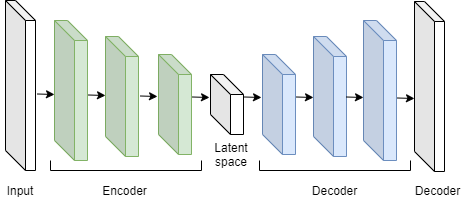

Encoder is a network that downsamples images into some latent space representation. Decoder upsamples from latent space to get the initial image. There are 3 layers in encoder and 3 layers in decoder. Try to play with the latent space size.

We suggest you to use tanh activation function for encoder and decoder layers.

Reconstruction Loss

Autoencoder is trained to minimize the following loss:

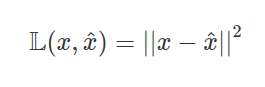

### **decision making**

After training the autoencoder to minimize the reconstruction loss for normal data samples, reconstruction loss threshold *t* is defined to make decision rule for separating normal and abnormal patterns. The full formulation of the anomaly detection using autoencoder can be expressed as follows:

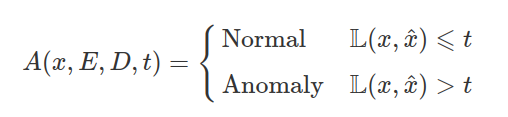

### **Grading policy**
You are free to experiment with data, methods and parameters, but the following things should be reflected in your code:

images of variable lenth should be allowed (make some preprocessing for that)


model will be evaluated using Precision and Recall (for both training dataset, and testing dataset)

USE RANDOM IMAGES FROM THE INTERNET TO TEST YOUR MODEL (10 to 15 images)
DO NOT FORGET TO INCLUDE THESE IMAGES WITH YOUR SUBMISSION

Your script should output predictions for test images in table (ypu can create a file predictions.csv) with the following format: file name, class label


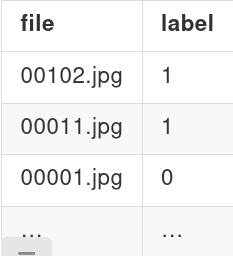



Class labels have the following mapping: positive - 1, negative - 0

**Important:** 0 points if we won’t be able to run your code

**Note:** Code quality will be evaluated. Up to -10% for not readable code.

**Note:** Your are free to use any framework (PyTorch, Keras, TensorFlow …).


In [1]:
import cv2
import os
from matplotlib import pyplot as plt

# loading the dataset

negative_samples = []
for file_name in os.listdir("Dataset/Negative"):
    img = cv2.imread("Dataset/Negative/" + file_name, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (80, 80))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    negative_samples.append(img)

positive_samples = []
for file_name in os.listdir("Dataset/Positive"):
    img = cv2.imread("Dataset/Positive/" + file_name, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (80, 80))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    positive_samples.append(img)

In [17]:
# splitting the dataset into train and validation sets

train_set = positive_samples[:int(len(positive_samples)*0.8)]

x_val = positive_samples[int(len(positive_samples)*0.8)+1:]
y_val = [1] * len(x_val)
x_val.extend(negative_samples)
y_val.extend([0] * len(negative_samples))

In [18]:
import numpy as np

train_set = np.array(train_set)
train_set = train_set.astype('float32') / 255.0
train_set = train_set.reshape((len(train_set), np.prod(train_set.shape[1:])))

x_val = np.array(x_val)
x_val = x_val.astype('float32') / 255.0
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))

y_val = np.array(y_val)

In [19]:
train_set.shape

(15118, 6400)

In [47]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

# autoencoder model
input_img = Input(shape = (6400,))
encoder_1 = Dense(1024, activation = 'relu')(input_img)
encoder_2 = Dense(256, activation = 'relu')(encoder_1)
encoder_3 = Dense(64, activation = 'relu')(encoder_2)
latent_space = Dense(32, activation = 'relu')(encoder_3)
decoder_4 = Dense(64, activation = 'relu')(latent_space)
decoder_5 = Dense(256, activation = 'relu')(decoder_4)
decoder_6 = Dense(1024, activation = 'relu')(decoder_5)
output_img = Dense(6400, activation = 'relu')(decoder_6)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer = 'adam', loss = 'mse')
autoencoder.fit(train_set, train_set, epochs = 25)

Epoch 1/25
473/473 [==============================] - 50s 103ms/step - loss: 0.1384
Epoch 2/25
473/473 [==============================] - 58s 123ms/step - loss: 0.0689
Epoch 3/25
473/473 [==============================] - 55s 116ms/step - loss: 0.0471
Epoch 4/25
473/473 [==============================] - 49s 104ms/step - loss: 0.0341
Epoch 5/25
473/473 [==============================] - 46s 96ms/step - loss: 0.0251
Epoch 6/25
473/473 [==============================] - 52s 111ms/step - loss: 0.0206
Epoch 7/25
473/473 [==============================] - 52s 111ms/step - loss: 0.0176
Epoch 8/25
473/473 [==============================] - 48s 102ms/step - loss: 0.0152
Epoch 9/25
473/473 [==============================] - 47s 100ms/step - loss: 0.0136
Epoch 10/25
473/473 [==============================] - 47s 100ms/step - loss: 0.0124
Epoch 11/25
473/473 [==============================] - 47s 100ms/step - loss: 0.0115
Epoch 12/25
473/473 [==============================] - 47s 100ms/step - los

In [ ]:
# on the following example, one can clearky see that autoencoder works well for "cracked" samples

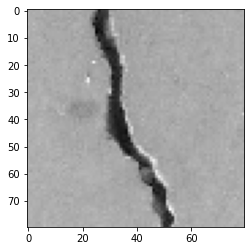

In [45]:
plt.imshow(train_set[0].reshape(80, 80), cmap = "gray")

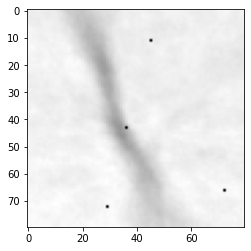

In [52]:
img = autoencoder.predict(np.resize(train_set[0], (1, 6400)))
plt.imshow(img.reshape(80, 80), cmap = "gray")

In [ ]:
# it also works not that bad for "non-cracked" samples, even though it never saw one during the training

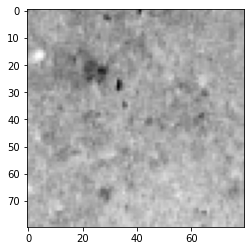

In [56]:
plt.imshow(x_val[7005].reshape(80, 80), cmap = "gray")

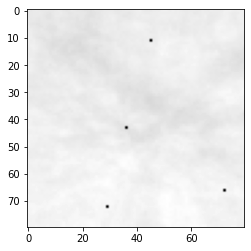

In [53]:
img = autoencoder.predict(np.resize(x_val[7005], (1, 6400)))
plt.imshow(img.reshape(80, 80), cmap = "gray")

In [57]:
from keras.losses import mse

# gathering some statistics to identify the best threshold value

reconstructions = autoencoder.predict(train_set)
reconstruction_errors = mse(reconstructions, train_set)
print(np.mean(reconstruction_errors.numpy()))
print(np.mean(reconstruction_errors.numpy()) - np.std(reconstruction_errors.numpy()))

0.0074120024
0.0042784866


In [71]:
reconstructions = autoencoder.predict(x_val)
reconstruction_errors = mse(reconstructions, x_val)
print(np.mean(reconstruction_errors.numpy()))

0.002924453


In [50]:
# unlike expected, here, the avg mse for "non-cracked" samples is lower than for "cracked" ones 
# even though autoencoder was trained on them
# my guess: it's because they are too similar to each other; there's not much to autoencode on them
# I have chosen a threshold value a bit higher than mean-std of "cracked" samples
# whatever is less than a threshold is classified as "non-cracked" (negative)
# whatever is more than a threshold ic classified as "cracked" (positive)

threshold = 0.005
y_pred = []
for i in range(len(reconstruction_errors)):
    if reconstruction_errors[i] > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("accuracy: ", accuracy_score(y_val, y_pred))
print("recall: ", recall_score(y_val, y_pred))
print("precision: ", precision_score(y_val, y_pred))
print("f1: ", f1_score(y_val, y_pred))

accuracy:  0.9638778220451527
recall:  0.855781952897592
precision:  0.922681883024251
f1:  0.8879736408566721


In [69]:
# predicting labels for images from testset and writing the results into predictions.csv
import csv
with open("predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['file', 'label'])
    for file_name in os.listdir("Testset"):
        img = cv2.imread("Testset/" + file_name, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (80, 80)) # prepocessing to include variable-length images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.array(img)
        img = img.astype('float32') / 255.0
        img = np.resize(img, (1, 6400))
        error = mse(autoencoder.predict(img).reshape(6400,), img.reshape(6400,))
        if error > threshold:
            writer.writerow([file_name, "1"])
        else:
            writer.writerow([file_name, "0"])